<a href="https://colab.research.google.com/github/rohitgit1/Technocolabs-Machine-Learning-Internship/blob/master/CNN_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense,Input,Multiply
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense
import numpy as np
from keras import backend as K
from keras.models import Model
from keras.callbacks import EarlyStopping

In [ ]:
train_data_dir = '/content/gdrive/My Drive/data/train/'
validation_data_dir = '/content/gdrive/My Drive/data/test/'

In [ ]:
img_height, img_width=100,100
epochs = 100
batch_size = 16
nb_train_samples = 2049
nb_validation_samples = 1838

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        rotation_range=10.,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical')

Found 2536 images belonging to 10 classes.


In [ ]:

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical')

Found 2636 images belonging to 10 classes.


In [ ]:
inputs = Input(shape=(100,100,3))
x = Conv2D(8, kernel_size=(5, 5), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(16, kernel_size=(5, 5), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(32, kernel_size=(5, 5), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(120, activation='relu')(x)
x = Dense(84, activation='relu')(x)
x = Dense(10, activation='softmax')(x)
cnn_model = Model(inputs=inputs,outputs = x)

In [ ]:
cnn_model.compile(loss='categorical_crossentropy',
              optimizer = SGD(lr=1e-3,momentum=0.9),#SGD(lr=1e-3,momentum=0.9)
              metrics=['accuracy'])

In [ ]:
cnn_model_history = cnn_model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples// batch_size ,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=nb_validation_samples// batch_size,
        workers = 4)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
128/128 [==============================] - 388s 3s/step - loss: 2.2076 - accuracy: 0.1975 - val_loss: 1.8933 - val_accuracy: 0.3361
Epoch 2/100
128/128 [==============================] - 83s 647ms/step - loss: 1.5392 - accuracy: 0.4043 - val_loss: 1.2851 - val_accuracy: 0.5115
Epoch 3/100
128/128 [==============================] - 24s 186ms/step - loss: 1.1808 - accuracy: 0.5549 - val_loss: 1.0628 - val_accuracy: 0.5927
Epoch 4/100
128/128 [==============================] - 11s 89ms/step - loss: 1.0083 - accuracy: 0.6118 - val_loss: 0.8312 - val_accuracy: 0.6694
Epoch 5/100
128/128 [==============================] - 9s 72ms/step - loss: 0.8184 - accuracy: 0.6814 - val_loss: 0.6064 - val_accuracy: 0.7615
Epoch 6/100
128/128 [==============================] - 8s 66ms/step - loss: 0.6621 - accuracy: 0.7495 - val_loss: 0.5486 - val_accuracy: 0.8021
Epoch 7/100
128/128 [==============================] - 

In [ ]:
inputs = Input(shape=(100,100,3))
c = Conv2D(8, kernel_size=(5, 5), activation='relu')(inputs)
p = MaxPooling2D(pool_size=(2, 2))(c)
r1 = Conv2D(16, kernel_size=(5, 5), activation='relu')(p)
r2 = Conv2D(16, kernel_size=(5, 5), activation='relu')(p)
r = Multiply()([r1,r2])
x = MaxPooling2D(pool_size=(2, 2))(r)
x = Conv2D(32, kernel_size=(5, 5), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(120, activation='relu')(x)
x = Dense(84, activation='relu')(x)
x = Dense(10, activation='softmax')(x)
rcnn1_model = Model(inputs=inputs,outputs = x)

In [ ]:
rcnn1_model.compile(loss='categorical_crossentropy',
              optimizer = SGD(lr=1e-3,momentum=0.9),#SGD(lr=1e-3,momentum=0.9)
              metrics=['accuracy'])

In [ ]:
rcnn1_model_history=rcnn1_model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples// batch_size ,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=nb_validation_samples// batch_size,
        workers = 4)

Epoch 1/100
128/128 [==============================] - 8s 62ms/step - loss: 2.3009 - accuracy: 0.1088 - val_loss: 2.2977 - val_accuracy: 0.1497
Epoch 2/100
128/128 [==============================] - 8s 60ms/step - loss: 2.2977 - accuracy: 0.1142 - val_loss: 2.2934 - val_accuracy: 0.1272
Epoch 3/100
128/128 [==============================] - 8s 61ms/step - loss: 2.2898 - accuracy: 0.1559 - val_loss: 2.2807 - val_accuracy: 0.1891
Epoch 4/100
128/128 [==============================] - 8s 62ms/step - loss: 2.0653 - accuracy: 0.2608 - val_loss: 1.8240 - val_accuracy: 0.3427
Epoch 5/100
128/128 [==============================] - 8s 61ms/step - loss: 1.5161 - accuracy: 0.4377 - val_loss: 1.3114 - val_accuracy: 0.5269
Epoch 6/100
128/128 [==============================] - 8s 60ms/step - loss: 1.2317 - accuracy: 0.5239 - val_loss: 0.9985 - val_accuracy: 0.6173
Epoch 7/100
128/128 [==============================] - 8s 60ms/step - loss: 1.0277 - accuracy: 0.6054 - val_loss: 0.9562 - val_accuracy:

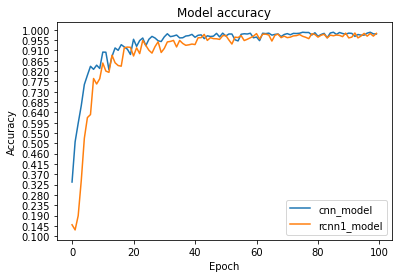

In [ ]:
import matplotlib.pyplot as plt
plt.plot(cnn_model_history.history['val_accuracy'])
plt.plot(rcnn1_model_history.history['val_accuracy'])
plt.rcParams['figure.figsize'] = (12.0, 5.0)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['cnn_model', 'rcnn1_model'], loc='lower right')
plt.yticks(np.linspace(0.1, 1, 21))
plt.show()

In [ ]:
inputs = Input(shape=(100,100,3))
x = Conv2D(8, kernel_size=(5, 5), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
r1 = Conv2D(16, kernel_size=(5, 5), activation='relu')(x)
r2 = Conv2D(16, kernel_size=(5, 5), activation='relu')(x)
r = Multiply()([r1,r2])
x = MaxPooling2D(pool_size=(2, 2))(r)
x = Conv2D(32, kernel_size=(5, 5), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(r)
x = Flatten()(x)
x = Dense(120, activation='relu')(x)
x = Dense(84, activation='relu')(x)
x = Dense(10, activation='softmax')(x)
rnn2_model = Model(inputs=inputs,outputs = x)

In [ ]:

rnn2_model.compile(loss='categorical_crossentropy',
              optimizer = SGD(lr=1e-3,momentum=0.9),#SGD(lr=1e-3,momentum=0.9)
              metrics=['accuracy'])

In [ ]:
rnn2_model_history=rnn2_model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples// batch_size ,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=nb_validation_samples// batch_size,
        workers = 4)

Epoch 1/100
128/128 [==============================] - 8s 61ms/step - loss: 2.1592 - accuracy: 0.2065 - val_loss: 1.6108 - val_accuracy: 0.3871
Epoch 2/100
128/128 [==============================] - 8s 60ms/step - loss: 1.3876 - accuracy: 0.4681 - val_loss: 1.1430 - val_accuracy: 0.5417
Epoch 3/100
128/128 [==============================] - 8s 60ms/step - loss: 1.0609 - accuracy: 0.6015 - val_loss: 0.8922 - val_accuracy: 0.6815
Epoch 4/100
128/128 [==============================] - 8s 60ms/step - loss: 0.9251 - accuracy: 0.6652 - val_loss: 0.6669 - val_accuracy: 0.7588
Epoch 5/100
128/128 [==============================] - 8s 59ms/step - loss: 0.8328 - accuracy: 0.6897 - val_loss: 0.6321 - val_accuracy: 0.7697
Epoch 6/100
128/128 [==============================] - 8s 59ms/step - loss: 0.6967 - accuracy: 0.7407 - val_loss: 0.6963 - val_accuracy: 0.7741
Epoch 7/100
128/128 [==============================] - 8s 59ms/step - loss: 0.6381 - accuracy: 0.7744 - val_loss: 0.4216 - val_accuracy:

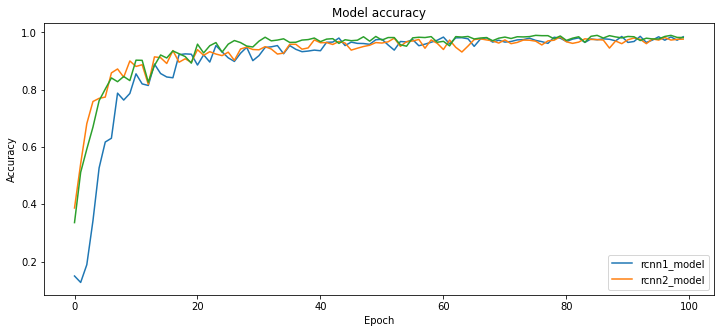

In [ ]:

plt.plot(rcnn1_model_history.history['val_accuracy'])
plt.plot(rnn2_model_history.history['val_accuracy'])
plt.plot(cnn_model_history.history['val_accuracy'])
plt.rcParams['figure.figsize'] = (16.0, 10.0)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['rcnn1_model', 'rcnn2_model'], loc='lower right')
plt.show()

In [ ]:
len(cnn_model_history.history['val_accuracy'])

100

In [ ]:
cnn_model_20=cnn_model_history.history['val_accuracy'][20:100]

In [ ]:
rnn1_model_20=rcnn1_model_history.history['val_accuracy'][20:100]
rnn2_model_20=rnn2_model_history.history['val_accuracy'][20:100]

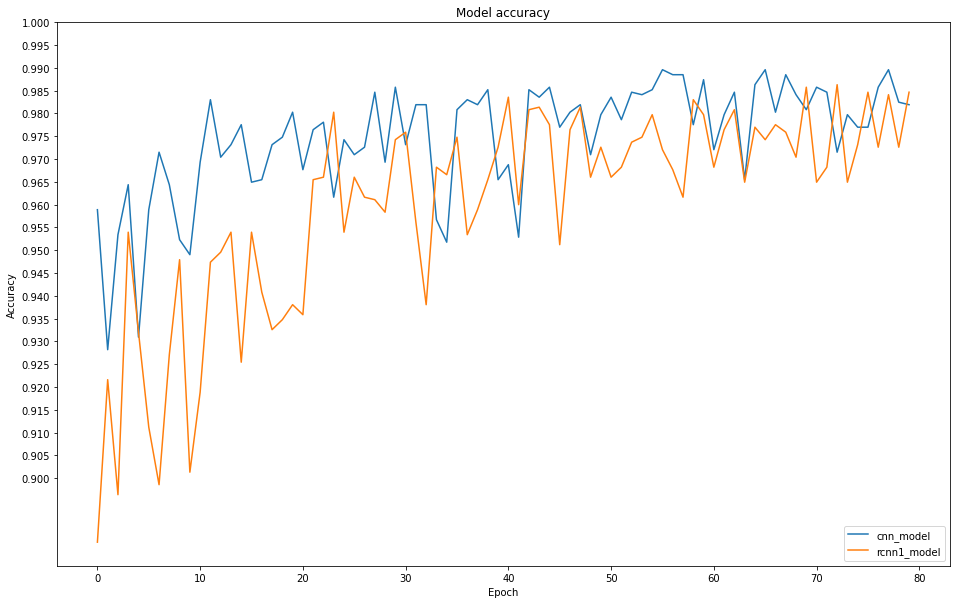

In [ ]:
plt.plot(cnn_model_20)
plt.plot(rnn1_model_20)
plt.rcParams['figure.figsize'] = (30.0, 5.0)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['cnn_model', 'rcnn1_model'], loc='lower right')
plt.yticks(np.linspace(0.9, 1, 21))
plt.savefig('./mstar.jpg')
plt.show()